# New Section

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pandas as pd
german = pd.read_csv(r'/content/drive/My Drive/german.csv', sep = ';')

In [ ]:
german.head(2)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Bad credit
0,1 : ... < 0 DM,6,4 : critical account/ other credits existing (...,3 : radio/television,1169,5 : unknown/ no savings account,5 : .. >= 7 years,4,3 : male : single,1 : none,4,1 : real estate,67,3 : none,2 : own,2,3 : skilled employee / official,1,"2 : yes, registered under the customers name",1 : yes,0
1,2 : 0 <= ... < 200 DM,48,2 : existing credits paid back duly till now,3 : radio/television,5951,1 : ... < 100 DM,3 : 1 <= ... < 4 years,2,2 : female : divorced/separated/married,1 : none,2,1 : real estate,22,3 : none,2 : own,1,3 : skilled employee / official,1,1 : none,1 : yes,1


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(german[['Credit amount']],
                                                    german['Duration in month'],
                                                    random_state = 42, test_size = 0.3)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(700, 1) (300, 1)
(700,) (300,)


In [ ]:
y_train.head(10)

541    24
440    12
482    30
422    12
778    36
949    24
334    24
576    12
934    12
567    24
Name: Duration in month, dtype: int64

In [ ]:
x_train.head(10)

,Credit amount
541,2032
440,1884
482,3622
422,958
778,5711
949,3621
334,4110
576,2930
934,1498
567,2578


In [7]:
# We will use linear_model from sklearn.
# We need to predict continiuse value, so we will use Regression
from sklearn.linear_model import LinearRegression
# create model
lin = LinearRegression()
# fit model
lin.fit(x_train, y_train)

# HW Try to add new feature in X. Here we use only  'Credit amount'

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
prediction_train = lin.predict(x_train)
prediction_test = lin.predict(x_test)


In [9]:
print(lin.intercept_)
print(lin.coef_)
print(f'Predicted Duration = {lin.intercept_} + {lin.coef_[0]} * Amount')

12.629467772713864
[0.00253122]
Predicted Duration = 12.629467772713864 + 0.0025312168585999635 * Amount


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
print('Train data:')
print(mean_squared_error(y_train, prediction_train))
print(r2_score(y_train, prediction_train))
print('Test data:')
print(mean_squared_error(y_test, prediction_test))
print(r2_score(y_test, prediction_test))

Train data:
84.90150146446818
0.3996029301446602
Test data:
97.49575047959273
0.3641270004847088


In [11]:
text_features = [col for col in german.columns if german[col].dtype == 'object']


In [12]:
# Create list of text features
text_features = [col for col in german.columns if german[col].dtype == 'object']
print(text_features)
# we can't use text features, so encode ones in numeric with fummies encoder
text_data = pd.get_dummies(german[text_features], prefix = text_features, drop_first = True)
print(text_data.columns)

['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker']
Index(['Status of existing checking account_2 : 0 <= ... < 200 DM',
       'Status of existing checking account_3 : ... >= 200 DM / salary assignments for at least 1 year',
       'Status of existing checking account_4 : no checking account',
       'Credit history_1 : all credits at this bank paid back duly',
       'Credit history_2 : existing credits paid back duly till now',
       'Credit history_3 : delay in paying off in the past',
       'Credit history_4 : critical account/ other credits existing (not at this bank)',
       'Purpose_1 : car (used)', 'Purpose_10 : others',
       'Purpose_2 : furniture/equipment', 'Purpose_3 : radio/television',
       'Purpose_4 : domestic appliances', 'Purpose_5 : repairs',
      

In [13]:
numeric_features = [col for col in german.columns if german[col].dtype != 'object']
print(numeric_features)
# concartenate encoded text data with numeric data
german_numeric = pd.concat([german[numeric_features], text_data], axis = 1)
print(german.shape, german_numeric.shape)

['Duration in month', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present residence since', 'Age in years', 'Number of existing credits at this bank', 'Number of people being liable to provide maintenance for', 'Bad credit']
(1000, 21) (1000, 49)


In [14]:
all_x_variables = german_numeric.columns.difference(['Bad credit']).tolist()
print(all_x_variables)

['Age in years', 'Credit amount', 'Credit history_1 : all credits at this bank paid back duly', 'Credit history_2 : existing credits paid back duly till now', 'Credit history_3 : delay in paying off in the past', 'Credit history_4 : critical account/ other credits existing (not at this bank)', 'Duration in month', 'Housing_2 : own', 'Housing_3 : for free', 'Installment rate in percentage of disposable income', 'Job_2 : unskilled - resident', 'Job_3 : skilled employee / official', 'Job_4 : management/ self-employed/ highly qualified employee/ officer', 'Number of existing credits at this bank', 'Number of people being liable to provide maintenance for', 'Other debtors / guarantors_2 : co-applicant', 'Other debtors / guarantors_3 : guarantor', 'Other installment plans_2 : stores', 'Other installment plans_3 : none', 'Personal status and sex_2 : female : divorced/separated/married', 'Personal status and sex_3 : male : single', 'Personal status and sex_4 : male : married/widowed', 'Present

In [15]:
german.loc[:, 'principal_pmt'] = german['Credit amount']/german['Duration in month']
german.head(2)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Bad credit,principal_pmt
0,1 : ... < 0 DM,6,4 : critical account/ other credits existing (...,3 : radio/television,1169,5 : unknown/ no savings account,5 : .. >= 7 years,4,3 : male : single,1 : none,4,1 : real estate,67,3 : none,2 : own,2,3 : skilled employee / official,1,"2 : yes, registered under the customers name",1 : yes,0,194.833333
1,2 : 0 <= ... < 200 DM,48,2 : existing credits paid back duly till now,3 : radio/television,5951,1 : ... < 100 DM,3 : 1 <= ... < 4 years,2,2 : female : divorced/separated/married,1 : none,2,1 : real estate,22,3 : none,2 : own,1,3 : skilled employee / official,1,1 : none,1 : yes,1,123.979167


In [16]:
#Find the average value of this (principal_pmt) column
german.principal_pmt.mean()

167.68702044503

In [17]:
# Lets try to predict is credit is bad
# put all our x_variables in X arrays, and 'Bad credit' column in y
x_train, x_test, y_train, y_test = train_test_split(german_numeric[all_x_variables]
                                                    , german_numeric['Bad credit']
                                                    , random_state = 42, test_size = 0.3)

In [ ]:
x_train

,Age in years,Credit amount,Credit history_1 : all credits at this bank paid back duly,Credit history_2 : existing credits paid back duly till now,Credit history_3 : delay in paying off in the past,Credit history_4 : critical account/ other credits existing (not at this bank),Duration in month,Housing_2 : own,Housing_3 : for free,Installment rate in percentage of disposable income,Job_2 : unskilled - resident,Job_3 : skilled employee / official,Job_4 : management/ self-employed/ highly qualified employee/ officer,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Other debtors / guarantors_2 : co-applicant,Other debtors / guarantors_3 : guarantor,Other installment plans_2 : stores,Other installment plans_3 : none,Personal status and sex_2 : female : divorced/separated/married,Personal status and sex_3 : male : single,Personal status and sex_4 : male : married/widowed,Present employment since_2 : ... < 1 year,Present employment since_3 : 1 <= ... < 4 years,Present employment since_4 : 4 <= ... < 7 years,Present employment since_5 : .. >= 7 years,Present residence since,Property_2 : if not 1 : building society savings agreement/ life insurance,"Property_3 : if not 1/2: car or other, not in attribute 6",Property_4 : unknown / no property,Purpose_1 : car (used),Purpose_10 : others,Purpose_2 : furniture/equipment,Purpose_3 : radio/television,Purpose_4 : domestic appliances,Purpose_5 : repairs,Purpose_6 : education,Purpose_8 : retraining,Purpose_9 : business,Savings account/bonds_2 : 100 <= ... < 500 DM,Savings account/bonds_3 : 500 <= ... < 1000 DM,Savings account/bonds_4 : .. >= 1000 DM,Savings account/bonds_5 : unknown/ no savings account,Status of existing checking account_2 : 0 <= ... < 200 DM,Status of existing checking account_3 : ... >= 200 DM / salary assignments for at least 1 year,Status of existing checking account_4 : no checking account,"Telephone_2 : yes, registered under the customers name",foreign worker_2 : no
541,60,2032,0,0,1,0,24,0,1,4,0,1,0,2,1,0,0,0,1,0,1,0,0,0,0,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
440,39,1884,0,1,0,0,12,1,0,4,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
482,57,3622,0,1,0,0,30,0,0,4,0,1,0,2,1,0,0,0,1,1,0,0,0,0,0,1,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
422,47,958,0,0,0,1,12,1,0,2,1,0,0,2,2,0,0,0,1,0,1,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
778,38,5711,0,0,0,1,36,1,0,4,0,0,1,2,1,0,0,0,1,0,1,0,0,0,0,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,39,6458,1,0,0,0,18,1,0,2,0,0,1,2,2,0,0,0,0,0,1,0,0,0,0,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
270,32,2662,0,1,0,0,18,1,0,4,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
860,27,5804,0,0,0,1,24,1,0,4,0,1,0,2,1,0,0,0,1,0,1,0,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
435,25,1484,0,1,0,0,12,1,0,2,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0


# New Section

In [19]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

[Text(167.4, 190.26, 'X[45] <= 0.5\nentropy = 0.88\nsamples = 700\nvalue = [491, 209]'),
 Text(83.7, 135.9, 'X[6] <= 33.0\nentropy = 0.976\nsamples = 425\nvalue = [251, 174]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 10975.5\nentropy = 0.939\nsamples = 343\nvalue = [221, 122]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.929\nsamples = 337\nvalue = [221, 116]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(125.55000000000001, 81.53999999999999, 'X[25] <= 0.5\nentropy = 0.947\nsamples = 82\nvalue = [30, 52]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.983\nsamples = 66\nvalue = [28, 38]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.544\nsamples = 16\nvalue = [2, 14]'),
 Text(251.10000000000002, 135.9, 'X[18] <= 0.5\nentropy = 0.55\nsamples = 275\nvalue = [240, 35]'),
 Text(209.25, 81.53999999999999, 'X[33] <= 0.5\nentropy = 0.887\nsamples = 46\nvalue = [32, 14]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy

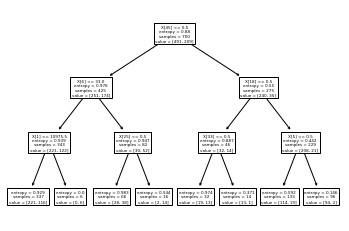

In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
tree.plot_tree(clf) 

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7166666666666667


In [ ]:
#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt


In [ ]:
forest = RandomForestClassifier(n_estimators=15, max_depth=300, random_state=44)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=44, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = forest.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7233333333333334


In [ ]:
#XGBClassifier

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
xgb_model = xgb.XGBClassifier()
np.arange(10, 100, 10)



array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
searcher = GridSearchCV(xgb_model, 
                        param_grid = {'n_estimators': np.arange(10, 200, 10),
                                      'max_depth': np.arange(3, 15),
                                      'learning_rate': [0.05, 0.1, 0.2],
                                      'min_child_weight': np.arange(10, 80, 20)
                                     }
                       , scoring = 'roc_auc', cv = 5, n_jobs = -1)
searcher.fit(x_train.values, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_child_weight': array([10, 

In [ ]:

searcher.best_params_


{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 10,
 'n_estimators': 50}

In [ ]:
from sklearn.metrics import roc_auc_score
def gini_score(y_true, y_pred):
    return -1 + 2 * roc_auc_score(y_true, y_pred)

In [ ]:
print(gini_score(y_train, searcher.predict_proba(x_train.values)[:,1]))
print(gini_score(y_test, searcher.predict_proba(x_test.values)[:,1]))

0.803759537707442
0.5447710184552288


In [ ]:
(roc_auc_score(y_train, searcher.predict_proba(x_train.values)[:,1]),
roc_auc_score(y_test, searcher.predict_proba(x_test.values)[:,1]))

(0.901879768853721, 0.7723855092276144)

In [ ]:
print(gini_score(y_train, searcher.predict_proba(x_train.values)[:,1]))
print(gini_score(y_test, searcher.predict_proba(x_test.values)[:,1]))

0.803759537707442
0.5447710184552288
